https://github.com/fwesel/T-KRR/tree/main/uci 

https://blink1073.github.io/oct2py/

# Code

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
N = 1e3
D = 3
cols = ['x' + str(i) for i in range(1, D + 1)]
np.random.seed(42)
x = np.random.uniform(size=(int(N), D))
inputs = pd.DataFrame(x, columns=cols)
inputs.head()

,x1,x2,x3
0,0.374540,0.950714,0.731994
1,0.598658,0.156019,0.155995
2,0.058084,0.866176,0.601115
3,0.708073,0.020584,0.969910
4,0.832443,0.212339,0.181825


## Non-separable

In [36]:
def nonsep1(x_arr):
    return np.sin(x_arr.prod())

df1 = inputs.copy(deep=True)
df1['y'] = df1.apply(nonsep1, axis=1)
df1.head()

,x1,x2,x3,y
0,0.374540,0.950714,0.731994,0.257708
1,0.598658,0.156019,0.155995,0.014570
2,0.058084,0.866176,0.601115,0.030238
3,0.708073,0.020584,0.969910,0.014136
4,0.832443,0.212339,0.181825,0.032134


In [37]:
df1.to_csv('T-KRR/nonsep1_data.dat', index=False, header=False)

In [5]:
def nonsep2(x_arr):
    return np.sum(x_arr)

df2 = inputs.copy(deep=True)
df2['y'] = df2[cols].apply(nonsep2, axis=1)
df2.head()

,x1,x2,x3,x4,y
0,0.374540,0.950714,0.731994,0.598658,2.655907
1,0.156019,0.155995,0.058084,0.866176,1.236273
2,0.601115,0.708073,0.020584,0.969910,2.299682
3,0.832443,0.212339,0.181825,0.183405,1.410011
4,0.304242,0.524756,0.431945,0.291229,1.552173


In [6]:
df2.to_csv('T-KRR/nonsep2_data.dat', index=False, header=False)

In [7]:
def nonsep3(x_arr):
    split = D // 2
    numer = x_arr[:split].prod() ** 1.5
    denom = (x_arr[:split].prod() ** 0.5) + (x_arr[split:].sum() ** 4)
    return numer / denom

df3 = inputs.copy(deep=True)
df3['y'] = df3[cols].apply(nonsep3, axis=1)
df3.head()

,x1,x2,x3,x4,y
0,0.374540,0.950714,0.731994,0.598658,0.056937
1,0.156019,0.155995,0.058084,0.866176,0.004287
2,0.601115,0.708073,0.020584,0.969910,0.171950
3,0.832443,0.212339,0.181825,0.183405,0.169583
4,0.304242,0.524756,0.431945,0.291229,0.094777


In [8]:
df3.to_csv('T-KRR/nonsep3_data.dat', index=False, header=False)

In [9]:
def nonsep4(x_arr):
    split = D // 2
    term1 = x_arr[:split].sum() ** 1.5
    term2 = (x_arr[:split].prod() ** 2) * np.sin(x_arr[split:].sum() ** -2)
    return term1 + term2

df4 = inputs.copy(deep=True)
df4['y'] = df4[cols].apply(nonsep4, axis=1)
df4.head()

,x1,x2,x3,x4,y
0,0.374540,0.950714,0.731994,0.598658,1.593491
1,0.156019,0.155995,0.058084,0.866176,0.174830
2,0.601115,0.708073,0.020584,0.969910,1.652272
3,0.832443,0.212339,0.181825,0.183405,1.097190
4,0.304242,0.524756,0.431945,0.291229,0.778817


In [10]:
df4.to_csv('T-KRR/nonsep4_data.dat', index=False, header=False)

In [11]:
def nonsep5(x_arr):
    split = D // 2
    return x_arr[:split].sum() / x_arr[split:].sum() 

df5 = inputs.copy(deep=True)
df5['y'] = df5[cols].apply(nonsep5, axis=1)
df5.head()

,x1,x2,x3,x4,y
0,0.374540,0.950714,0.731994,0.598658,0.995943
1,0.156019,0.155995,0.058084,0.866176,0.337582
2,0.601115,0.708073,0.020584,0.969910,1.321752
3,0.832443,0.212339,0.181825,0.183405,2.860617
4,0.304242,0.524756,0.431945,0.291229,1.146333


In [12]:
df5.to_csv('T-KRR/nonsep5_data.dat', index=False, header=False)

## Separable

In [13]:
def sep1(x_arr):
    return x_arr.prod() ** (1/5)

dg1 = inputs.copy(deep=True)
dg1['y'] = dg1[cols].apply(sep1, axis=1)
dg1.head()

,x1,x2,x3,x4,y
0,0.374540,0.950714,0.731994,0.598658,0.689679
1,0.156019,0.155995,0.058084,0.866176,0.261571
2,0.601115,0.708073,0.020584,0.969910,0.385355
3,0.832443,0.212339,0.181825,0.183405,0.358170
4,0.304242,0.524756,0.431945,0.291229,0.457687


In [14]:
dg1.to_csv('T-KRR/sep1_data.dat', index=False, header=False)

In [15]:
def sep2(x_arr):
    split = D // 2
    return x_arr[:split].prod() / x_arr[split:].prod()

dg2 = inputs.copy(deep=True)
dg2['y'] = dg2[cols].apply(sep2, axis=1)
dg2.head()

,x1,x2,x3,x4,y
0,0.374540,0.950714,0.731994,0.598658,0.812572
1,0.156019,0.155995,0.058084,0.866176,0.483756
2,0.601115,0.708073,0.020584,0.969910,21.318850
3,0.832443,0.212339,0.181825,0.183405,5.300548
4,0.304242,0.524756,0.431945,0.291229,1.269153


<BarContainer object of 40 artists>

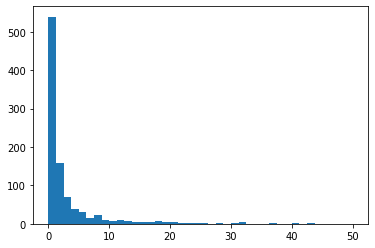

In [16]:
plt.hist(dg2['y'], bins=40, range=(0, 50))[2]

In [17]:
dg2.to_csv('T-KRR/sep2_data.dat', index=False, header=False)

In [18]:
def sep3(x_arr):
    return x_arr.prod() ** -1

dg3 = inputs.copy(deep=True)
dg3['y'] = dg3[cols].apply(sep3, axis=1)
dg3.head()

,x1,x2,x3,x4,y
0,0.374540,0.950714,0.731994,0.598658,6.408627
1,0.156019,0.155995,0.058084,0.866176,816.684535
2,0.601115,0.708073,0.020584,0.969910,117.677404
3,0.832443,0.212339,0.181825,0.183405,169.649334
4,0.304242,0.524756,0.431945,0.291229,49.791982


In [19]:
dg3['y'].describe()

count    1.000000e+03
mean     4.378626e+03
std      7.649596e+04
min      1.512988e+00
25%      1.366167e+01
50%      4.265641e+01
75%      1.711562e+02
max      2.107801e+06
Name: y, dtype: float64

In [20]:
dg3.to_csv('T-KRR/sep3_data.dat', index=False, header=False)

In [21]:
def sep4(x_arr):
    split = D // 2
    return (x_arr[:split].prod() ** 2) / (x_arr[split:].prod())

dg4 = inputs.copy(deep=True)
dg4['y'] = dg4[cols].apply(sep4, axis=1)
dg4.head()

,x1,x2,x3,x4,y
0,0.374540,0.950714,0.731994,0.598658,0.289341
1,0.156019,0.155995,0.058084,0.866176,0.011774
2,0.601115,0.708073,0.020584,0.969910,9.074007
3,0.832443,0.212339,0.181825,0.183405,0.936926
4,0.304242,0.524756,0.431945,0.291229,0.202624


In [22]:
dg4.to_csv('T-KRR/sep4_data.dat', index=False, header=False)

In [23]:
def sep5(x_arr):
    return np.exp(x_arr.sum())

dg5 = inputs.copy(deep=True)
dg5['y'] = dg4[cols].apply(sep5, axis=1)
dg5.head()

,x1,x2,x3,x4,y
0,0.374540,0.950714,0.731994,0.598658,14.237892
1,0.156019,0.155995,0.058084,0.866176,3.442758
2,0.601115,0.708073,0.020584,0.969910,9.971011
3,0.832443,0.212339,0.181825,0.183405,4.096001
4,0.304242,0.524756,0.431945,0.291229,4.721719


In [24]:
dg5.to_csv('T-KRR/sep5_data.dat', index=False, header=False)

In [25]:
def sep6(x_arr):
    return np.sin(x_arr.sum())

dg6 = inputs.copy(deep=True)
dg6['y'] = dg6[cols].apply(sep6, axis=1)
dg6.head()

,x1,x2,x3,x4,y
0,0.374540,0.950714,0.731994,0.598658,0.466815
1,0.156019,0.155995,0.058084,0.866176,0.944567
2,0.601115,0.708073,0.020584,0.969910,0.745917
3,0.832443,0.212339,0.181825,0.183405,0.987102
4,0.304242,0.524756,0.431945,0.291229,0.999827


In [26]:
dg6.to_csv('T-KRR/sep6_data.dat', index=False, header=False)

In [27]:
def sep7(x_arr):
    split = D // 2
    return x_arr[:split].prod() * np.exp(x_arr[split:].sum())

dg7 = inputs.copy(deep=True)
dg7['y'] = dg7[cols].apply(sep7, axis=1)
dg7.head()

,x1,x2,x3,x4,y
0,0.374540,0.950714,0.731994,0.598658,1.347235
1,0.156019,0.155995,0.058084,0.866176,0.061332
2,0.601115,0.708073,0.020584,0.969910,1.146045
3,0.832443,0.212339,0.181825,0.183405,0.254684
4,0.304242,0.524756,0.431945,0.291229,0.329039


In [28]:
dg7.to_csv('T-KRR/sep7_data.dat', index=False, header=False)